<a href="https://colab.research.google.com/github/VioletKarasik/Colaboratory/blob/main/Peer_gradedAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ текста песен из Spotify
В этом проекте мы будем анализировать текстовые данные песен, собранные из набора данных Spotify. Мы будем использовать различные техники обработки текста для выявления популярных слов и создания облака слов.


In [5]:
# Импорт необходимых библиотек
import pandas as pd
import nltk
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Загрузка данных из CSV файла
data = pd.read_csv('Spotify-2000.csv', encoding='utf-8')

# Просмотр первых 5 строк данных
print(data.head())

   Index                   Title             Artist            Top Genre  \
0      1                 Sunrise        Norah Jones      adult standards   
1      2             Black Night        Deep Purple           album rock   
2      3          Clint Eastwood           Gorillaz  alternative hip hop   
3      4           The Pretender       Foo Fighters    alternative metal   
4      5  Waitin' On A Sunny Day  Bruce Springsteen         classic rock   

   Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
0  2004                     157      30            53            -14   
1  2000                     135      79            50            -11   
2  2001                     168      69            66             -9   
3  2007                     173      96            43             -4   
4  2002                     106      82            58             -5   

   Liveness  Valence Length (Duration)  Acousticness  Speechiness  Popularity  
0        11       68          

# Предварительная обработка данных

In [6]:
# Подсчет количества песен в каждом жанре
genre_counts = data['Top Genre'].value_counts()

# Просмотр 5 самых популярных жанров
print(genre_counts.head())

Top Genre
album rock          413
adult standards     123
dutch pop            88
alternative rock     86
dance pop            83
Name: count, dtype: int64


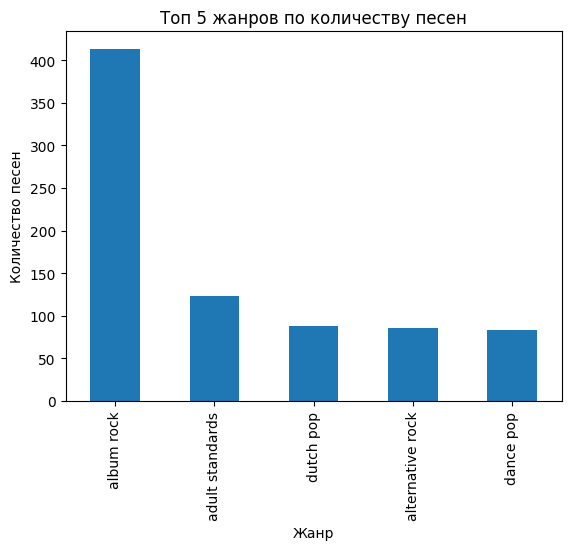

In [8]:
# Визуализация топ 5 жанров
genre_counts.head(5).plot(kind='bar', title='Топ 5 жанров по количеству песен')
plt.xlabel('Жанр')
plt.ylabel('Количество песен')
plt.show()

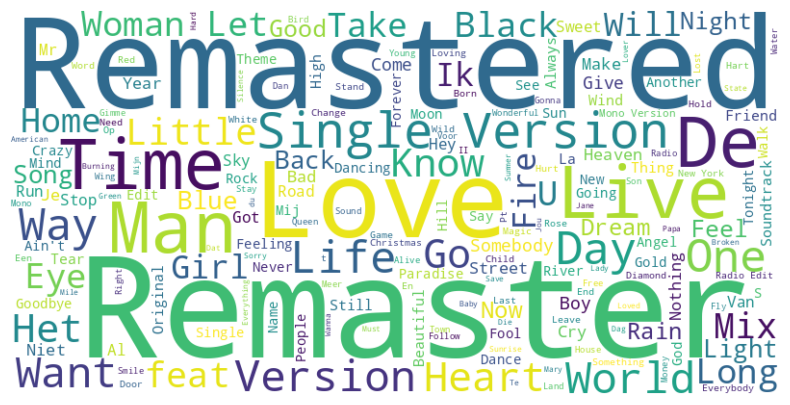

In [9]:
# Генерация облака слов для названий песен
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['Title']))

# Отображение облака слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
# Подсчет средних значений для BPM, Energy, Danceability и Popularity
mean_values = data[['Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Popularity']].mean()
print(mean_values)

Beats Per Minute (BPM)    120.215647
Energy                     59.679539
Danceability               53.238215
Popularity                 59.526580
dtype: float64


Средняя популярность песен Arctic Monkeys: 65.75


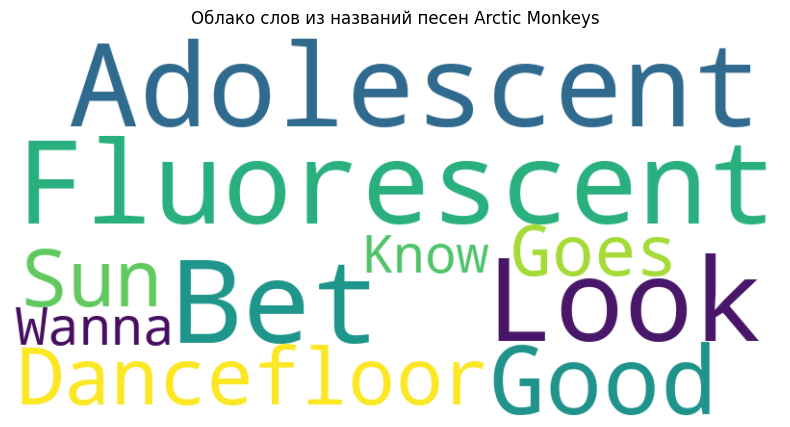

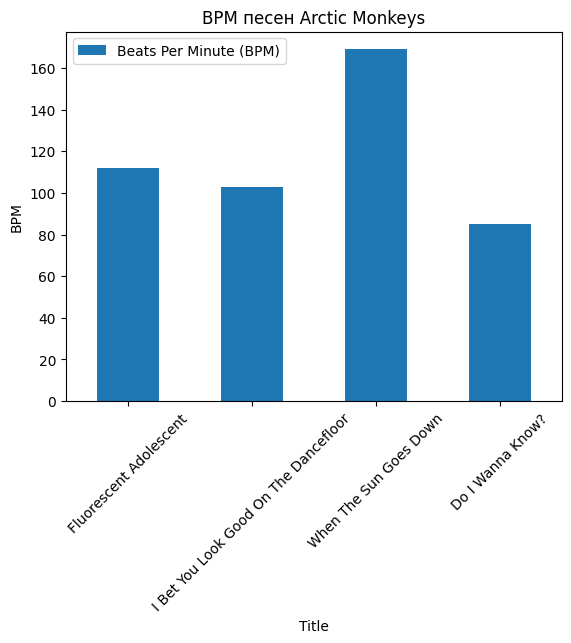

In [12]:
# Фильтрация данных для Arctic Monkeys
arctic_monkeys_data = data[data['Artist'] == 'Arctic Monkeys']

# Подсчет средней популярности
average_popularity = arctic_monkeys_data['Popularity'].mean()

print(f'Средняя популярность песен Arctic Monkeys: {average_popularity:.2f}')

# Генерация облака слов для названий песен Arctic Monkeys
arctic_titles = ' '.join(arctic_monkeys_data['Title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(arctic_titles)

# Отображение облака слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов из названий песен Arctic Monkeys')
plt.show()

# График BPM песен Arctic Monkeys
arctic_monkeys_data[['Title', 'Beats Per Minute (BPM)']].set_index('Title').plot(kind='bar', title='BPM песен Arctic Monkeys')
plt.ylabel('BPM')
plt.xticks(rotation=45)
plt.show()